# Plotting for Exploratory data analysis (EDA)

## (3.1) Basic Terminology

### What is EDA?

Data-point/vector/Observation
Data-set.
Feature/Variable/Input-variable/InDependent-varibale
Label/depdendent-variable/Output-varible/Class/Class-label/Response label
Vector: 2-D, 3-D, 4-D,.... n-D
Q. What is a 1-D vector: Scalar



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
print (iris.shape)

(150, 6)


In [7]:
print (iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [9]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# (3.2) 2-D Scatter Plot

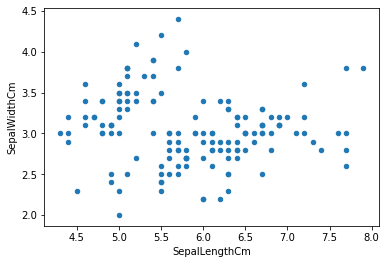

In [12]:
iris.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm') ;
plt.show()


C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


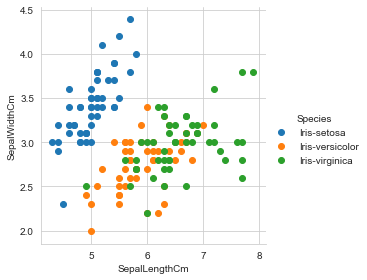

In [13]:
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();
plt.show();


### Observation(s):

[1]  Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
[2]  Seperating Versicolor from Viginica is much harder as they have considerable overlap.

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?

# (3.3) Pair-plot

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


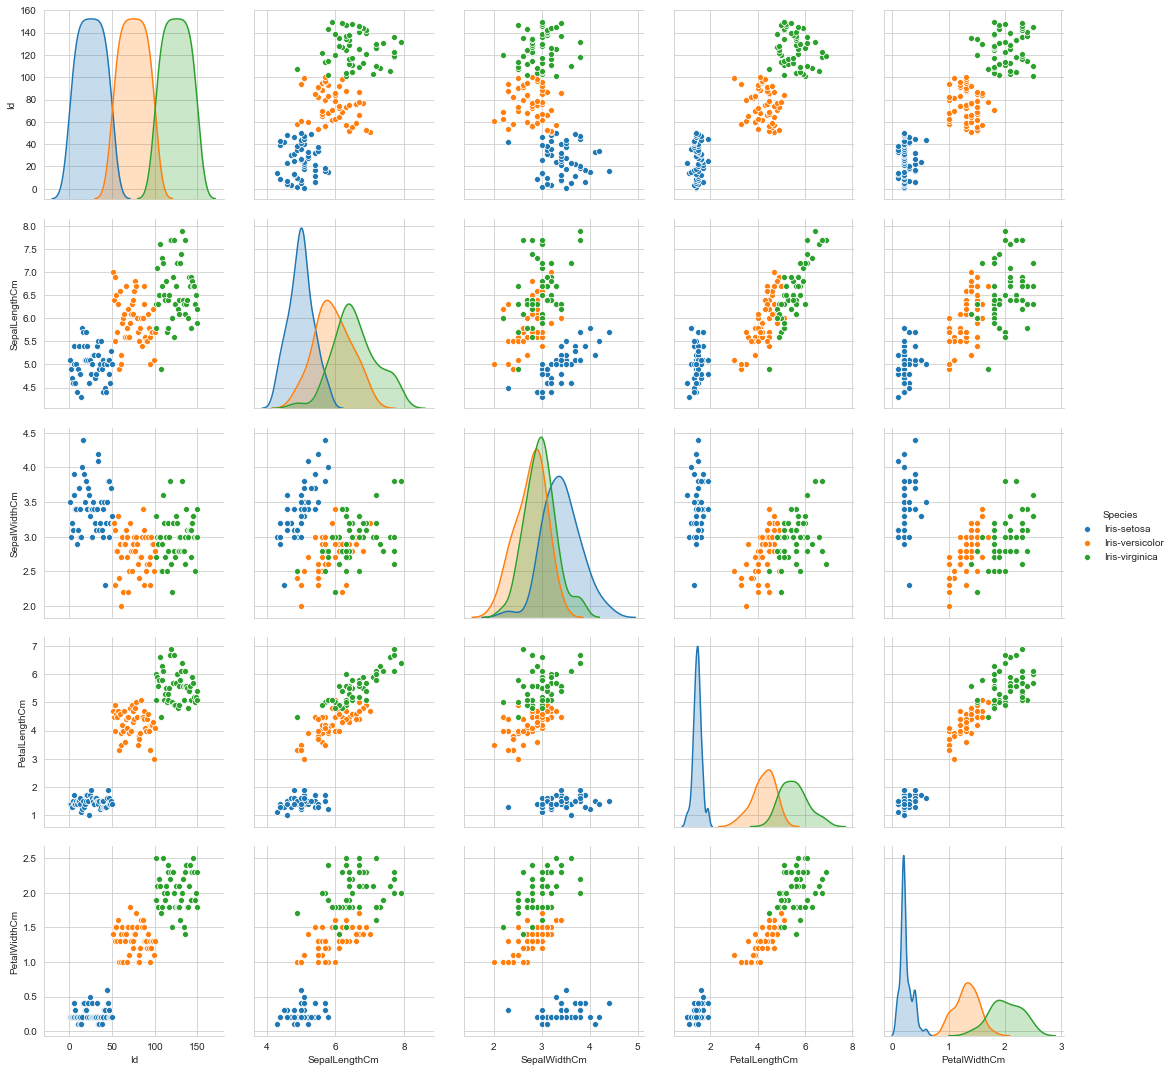

In [14]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="Species", size=3);
plt.show()

# Observations

[1]  petal_length and petal_width are the most useful features to identify various flower types.

[2]  While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).

[3]  We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.


# (3.4) Histogram, PDF, CDF

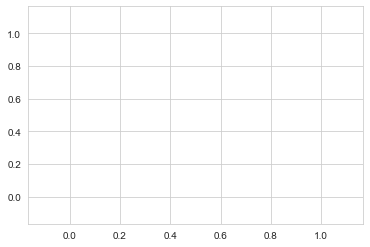

In [15]:
import numpy as np
iris_setosa = iris.loc[iris["Species"] == "setosa"];
iris_virginica = iris.loc[iris["Species"] == "virginica"];
iris_versicolor = iris.loc[iris["Species"] == "versicolor"];
#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["PetalLengthCm"], np.zeros_like(iris_setosa['PetalLengthCm']), 'o')
plt.plot(iris_versicolor["PetalLengthCm"], np.zeros_like(iris_versicolor['PetalLengthCm']), 'o')
plt.plot(iris_virginica["PetalLengthCm"], np.zeros_like(iris_virginica['PetalLengthCm']), 'o')

plt.show()

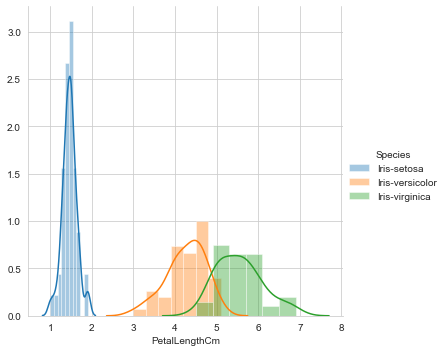

In [16]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(sns.distplot, "PetalLengthCm") \
   .add_legend();
plt.show();

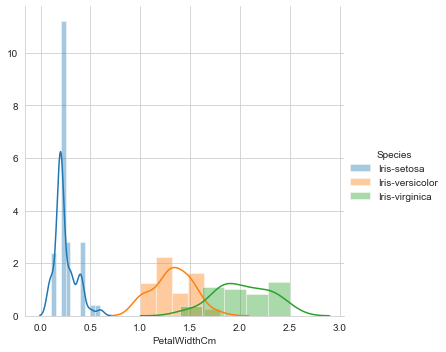

In [17]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(sns.distplot, "PetalWidthCm") \
   .add_legend();
plt.show();

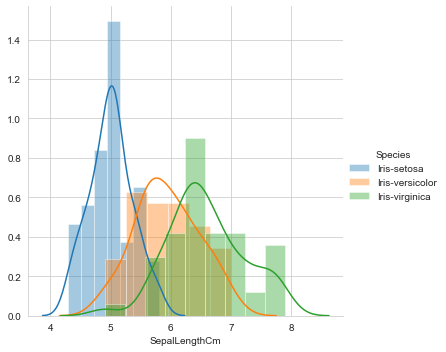

In [18]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(sns.distplot, "SepalLengthCm") \
   .add_legend();
plt.show();

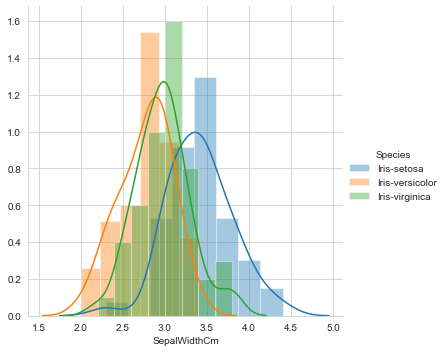

In [19]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(sns.distplot, "SepalWidthCm") \
   .add_legend();
plt.show();

[nan nan nan nan nan nan nan nan nan nan]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


C:\Users\DELL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


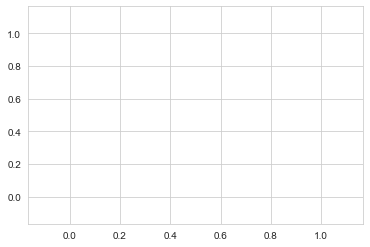

In [21]:
counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

[nan nan nan nan nan nan nan nan nan nan]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


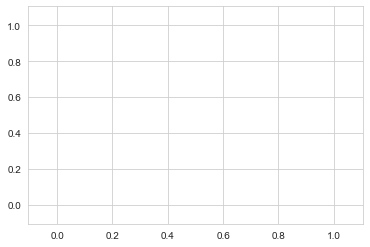

In [22]:
counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

[nan nan nan nan nan nan nan nan nan nan]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[nan nan nan nan nan nan nan nan nan nan]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[nan nan nan nan nan nan nan nan nan nan]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


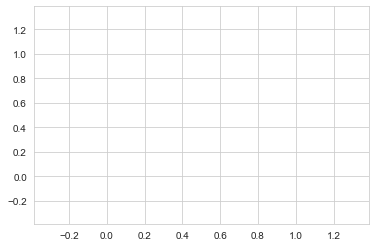

In [23]:
counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

# (3.5) Mean, Variance and Std-dev

In [26]:
print("Means:")
print(np.mean(iris_setosa["PetalLengthCm"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["PetalLengthCm"],50)));
print(np.mean(iris_virginica["PetalLengthCm"]))
print(np.mean(iris_versicolor["PetalLengthCm"]))

print("\nStd-dev:");
print(np.std(iris_setosa["PetalLengthCm"]))
print(np.std(iris_virginica["PetalLengthCm"]))
print(np.std(iris_versicolor["PetalLengthCm"]))

Means:
nan
50.0
nan
nan

Std-dev:
nan
nan
nan


# (3.7) Box plot and Whiskers

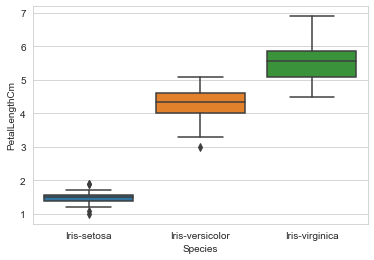

In [31]:
sns.boxplot(x='Species',y='PetalLengthCm', data=iris)
plt.show()

# (3.8) Violin plots

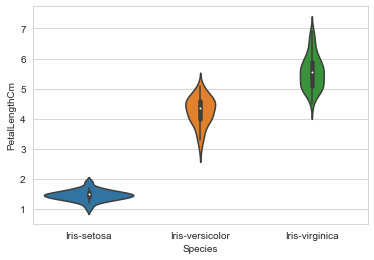

In [32]:
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=8)
plt.show()

# (3.9) Summarizing plots in english

Exaplain your findings/conclusions in plain english
Never forget your objective (the probelm you are solving) . Perform all of your EDA aligned with your objectives.


# (3.11) Multivariate probability density, contour plot

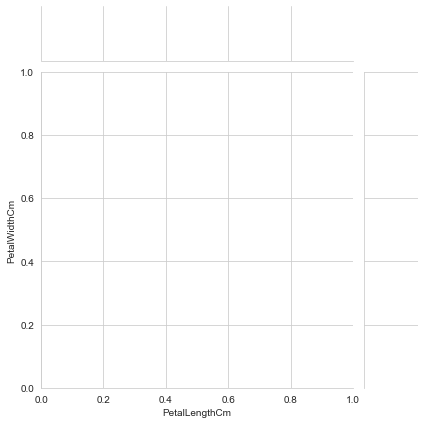

In [36]:
sns.jointplot(x="PetalLengthCm", y="PetalWidthCm", data=iris_setosa, kind="kde");
plt.show();